In [1]:
import imageio as io
import numpy as np
benchmark = np.asarray(io.imread(r'../../DeepD3_Benchmark.tif'))

/var/folders/cw/336xc46n4tz5zvr9w_gq3mb40000gn/T/ipykernel_6727/3122189689.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  benchmark = np.asarray(io.imread(r'../../DeepD3_Benchmark.tif'))


In [2]:
import matplotlib.pyplot as plt

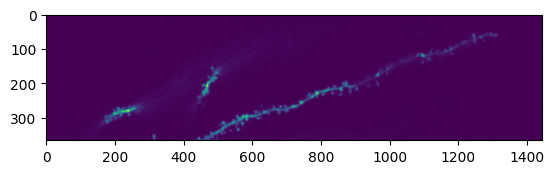

In [3]:
plt.imshow(benchmark[35])

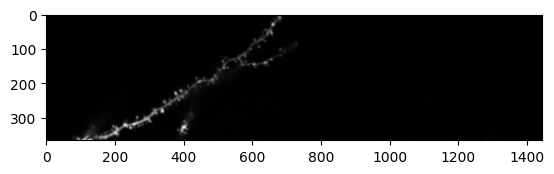

In [4]:
from skimage import data
import matplotlib.pyplot as plt
#
image = benchmark
plt.imshow(image[54], cmap='gray')

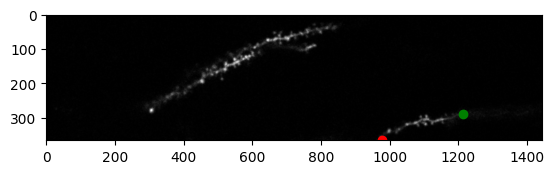

In [5]:
import numpy as np

start_point = np.array([12, 289, 1213]) # [y, x] or [z,x,y]
end_point = np.array([19, 365, 977])

# let's show the start and end points
plt.imshow(image[15], cmap='gray')
plt.plot(start_point[2], start_point[1], 'og')
plt.plot(end_point[2], end_point[1], 'or')

In [6]:
from brightest_path_lib.algorithm import AStarSearch
search_algorithm = AStarSearch(image, start_point=start_point, goal_point=end_point)
brightest_path =search_algorithm.search()

In [9]:
from brightest_path_lib.algorithm import AStarSearch
search_algorithm = AStarSearch(image, start_point=start_point, goal_point=end_point)
brightest_path =search_algorithm.search()

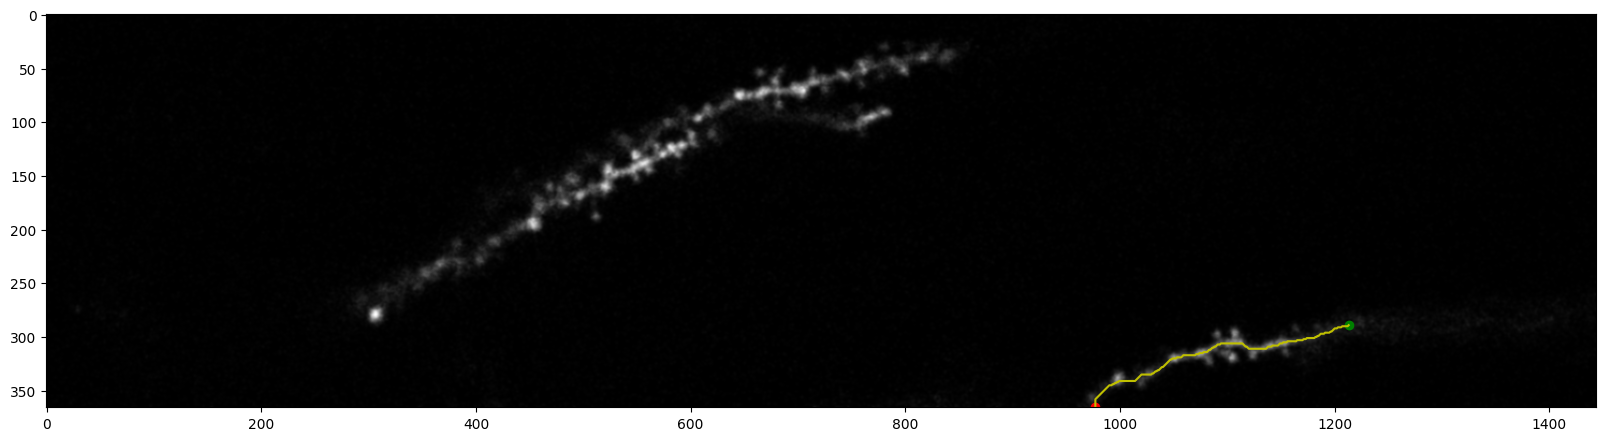

In [7]:
plt.figure(figsize=(20, 10))
plt.imshow(image[15], cmap='gray')
plt.plot(start_point[2], start_point[1], 'og')
plt.plot(end_point[2], end_point[1], 'or')
plt.plot([point[2] for point in search_algorithm.result], [point[1] for point in brightest_path], '-y')


In [ ]:
from brightest_path_lib.algorithm import NBAStarSearch

In [ ]:
search_algorithm = NBAStarSearch(image, start_point=start_point, goal_point=end_point)
brightest_path =search_algorithm.search()

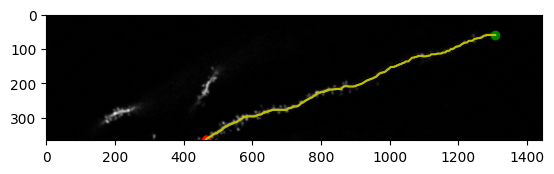

In [ ]:
plt.imshow(image[36], cmap='gray')
plt.plot(start_point[2], start_point[1], 'og')
plt.plot(end_point[2], end_point[1], 'or')
plt.plot([point[2] for point in search_algorithm.result], [point[1] for point in brightest_path], '-y')
